Performed a one-tailed one-sample t-test on NVIDIA stock returns (t = 2.95, p = 0.0016), finding statistically significant positive average returns.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scipy.stats as stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

In [7]:
dfa=pd.read_csv("D://google//apple_stock.csv")
dfn=pd.read_csv("D://google//nvidia_stock.csv")


In [8]:
dfn.head()

,Date,Close,High,Low,Open,Volume
0,1/2/2020,5.972160,5.972160,5.892751,5.943284,237536000
1,1/3/2020,5.876571,5.920384,5.827531,5.852425,205384000
2,1/6/2020,5.901215,5.906443,5.757083,5.783221,262636000
3,1/7/2020,5.972659,6.018463,5.884537,5.929594,314856000
4,1/8/2020,5.983860,6.025184,5.928348,5.968427,277108000


In [9]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1318 non-null   object 
 1   Close   1318 non-null   float64
 2   High    1318 non-null   float64
 3   Low     1318 non-null   float64
 4   Open    1318 non-null   float64
 5   Volume  1318 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 61.9+ KB


In [ ]:
dfn['Date'] = pd.to_datetime(dfn['Date'])  # convert if not already datetime
dfn.set_index('Date', inplace=True)        # set as index


In [17]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1318 entries, 2020-01-02 to 2025-03-31
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         1318 non-null   float64
 1   High          1318 non-null   float64
 2   Low           1318 non-null   float64
 3   Open          1318 non-null   float64
 4   Volume        1318 non-null   int64  
 5   daily_return  1317 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 72.1 KB


Convert price → daily returns
daily return=today close price-yesterday close price/yesterday close price

In [14]:
dfn['daily_return'] = dfn['Close'].pct_change()

In [16]:
dfn.describe()

,Close,High,Low,Open,Volume,daily_return
count,1318.000000,1318.000000,1318.000000,1318.000000,1.318000e+03,1317.000000
mean,42.461749,43.274441,41.595978,42.487475,4.392756e+08,0.002790
std,41.709973,42.538666,40.874345,41.811879,1.880826e+08,0.034352
min,4.891976,5.229233,4.500419,4.984136,9.788400e+07,-0.184521
25%,13.733858,13.984783,13.486901,13.790609,2.978700e+08,-0.016574
50%,22.174110,22.559136,21.803054,22.233745,4.120410e+08,0.003209
75%,48.511766,49.230681,47.836847,48.446609,5.423460e+08,0.022536
max,149.416245,153.115916,147.806407,153.015919,1.543911e+09,0.243696


Define hypothesis:

H₀: Mean daily return ≤ 0

H₁: Mean daily return > 0
(Significance level typically α = 0.05)

In [ ]:
Sample testing:
count=1317
x=0.002790
s=0.034352

Perform:

One-sample one-tailed t-test:

t test = t= t = (x̄ - μ) / (σ / √n)= 2.95
df= n-1
p value=check z score table value of 2.95 = .9984
hence right side value will be 1-.9984=.0016

since .0016<.05
reject the null hypthesis,mean daily return greater than 0 which is a positive sign.

# Conclusion-reject the null hypthesis,mean daily return greater than zero which is a positive sign.

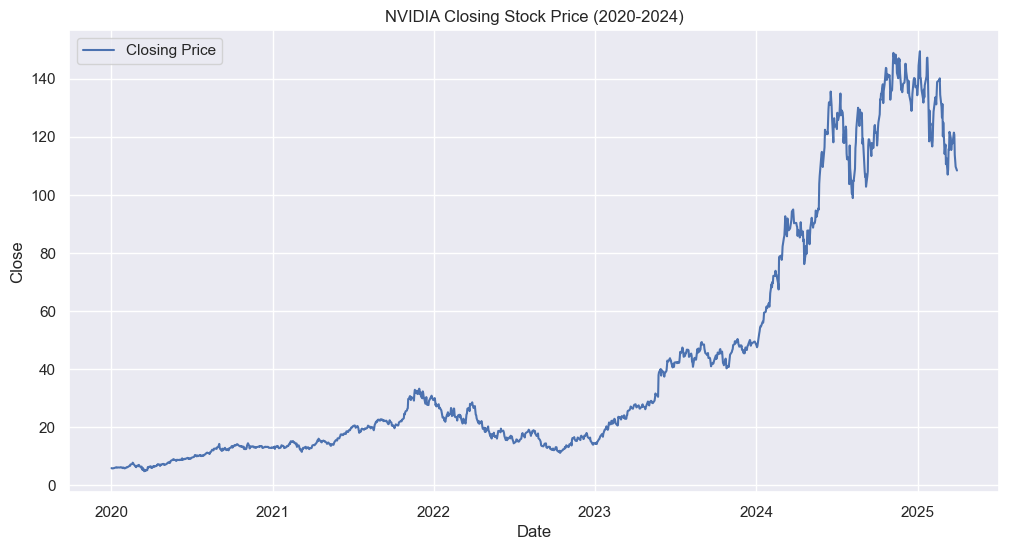

In [26]:
# Step 2: Plot Closing Price Over Time
plt.figure(figsize=(12,6))
plt.plot(dfn['Close'], label='Closing Price')
plt.title('NVIDIA Closing Stock Price (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()